# Introduction

This notebook is a 'quick-start' for the [CGIAR Crop Yield Prediction Challenge](https://zindi.africa/competitions/cgiar-crop-yield-prediction-challenge). We'll take a look at the data, fit a quick model and make a submission, with hints at each stage for extra options to investigate.

Let's dive in!

# Setup

You can get the zip files from Zindi or add to your Google drive using the following links:

Test data: https://drive.google.com/file/d/1yTEgzn8JJn0mZmJ7NDUbwAB1WSzwRScB/view?usp=sharing

Training data: 
https://drive.google.com/file/d/1-0UNiBpvfdRq8rgUC3Kb22YPWP_YnoKj/view?usp=sharing

You'll also need the smaller files from Zindi (Train.csv, SampleSubmission.csv and bandnames.txt) which you can just upload using the files tab.

In [4]:
# Copying in the zip files from Google Drive (alternately just upload them)
!cp 'drive/My Drive/image_arrays_train.zip' .
!cp 'drive/My Drive/image_arrays_test.zip' .

cp: drive/My Drive/image_arrays_train.zip: No such file or directory
cp: drive/My Drive/image_arrays_test.zip: No such file or directory


In [5]:
# Extract
!unzip -q image_arrays_train.zip
!unzip -q image_arrays_test.zip

unzip:  cannot find or open image_arrays_train.zip, image_arrays_train.zip.zip or image_arrays_train.zip.ZIP.
unzip:  cannot find or open image_arrays_test.zip, image_arrays_test.zip.zip or image_arrays_test.zip.ZIP.


In [6]:
# Check the CSV files are present
!ls *.csv # Upload through the files menu

SampleSubmission.csv Sub.csv              Train.csv


In [7]:
# Check for bandnames.txt
!ls *.txt

bandnames.txt


# Loading the data

The data isn't a simple table - instead we must read the inputs from individual .npy files. Here we'll load the dataframes, open a file or two and take a look at the format.

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# Train.csv has the Field_IDs needed to find the npy files
train = pd.read_csv('Train.csv')
print(train.shape)
train.head()

(2977, 4)


,Field_ID,Year,Quality,Yield
0,MH2O0YH,2019,3,3.686
1,O9TURWL,2019,2,5.657
2,35AFSDD,2019,3,3.082
3,PM05EG9,2019,2,2.707
4,V7PZBCG,2019,2,2.679


Loading image_arrays_train/6B42A8M.npy as an array
Array shape: (360, 41, 41)


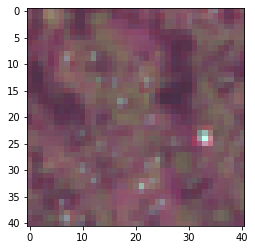

In [10]:
# Look at a sample:
fid = train['Field_ID'].sample().values[0]
fn = f'image_arrays_train/{fid}.npy' # File name based on Field_ID
print(f'Loading {fn} as an array')
arr = np.load(fn) # Loading the data with numpy
print('Array shape:', arr.shape) # 360 bands, images 40 or 41px a side
rgb_jan = np.stack([arr[4], arr[3], arr[2]], axis=-1) # Combine three bands for viewing
rgb_jan = rgb_jan / np.max(rgb_jan) # Scale band values to (0, 1) for easy image display
plt.imshow(rgb_jan) # View with matplotlib

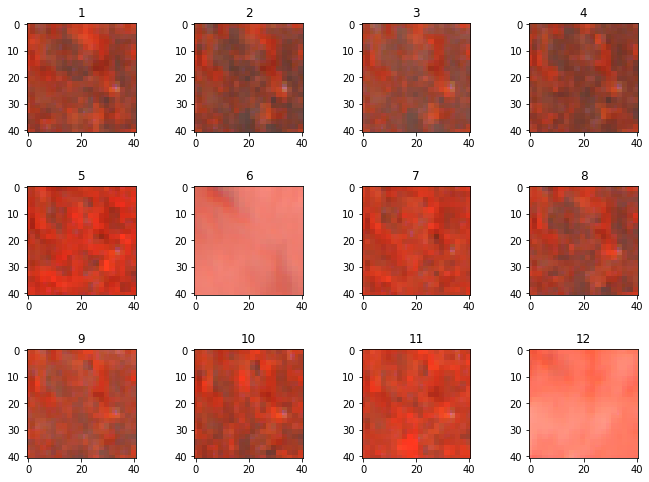

In [11]:
# View false colour images from each month in the year:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(12):
  rgb = np.stack([arr[i*30 + 8], arr[i*30 + 4], arr[i*30 + 3]], axis=-1) # False colour (band 8, 4 and 3)
  rgb = rgb / 4000 # Scaling consistently 
  axs[i].imshow(rgb.clip(0, 1))
  axs[i].set_title(str(i+1))

What's with the white fluffy stuff? These are clouds - the bane of all remote sensing analysts...

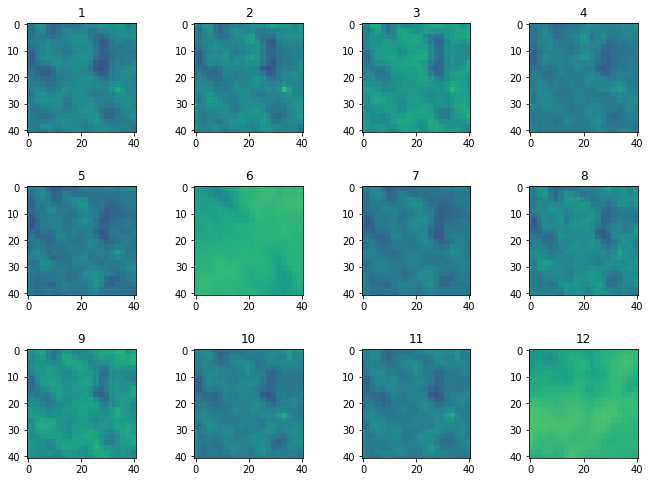

In [12]:
# Show the SWIR band (B12) where clouds have a high reflectance
fig, axs = plt.subplots(3, 4, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(12):
  cloud = arr[i*30 + 11]
  axs[i].imshow(cloud, vmin=0, vmax=4000)
  axs[i].set_title(str(i+1))

# Sampling from the images

There are some hard-coded band indexes in the examples above that won't have made sense - how did we know which bands were which?
There are 30 bands for each month. You can see the full list of bands with:

In [60]:
band_names = [l.strip() for l in open('bandnames.txt', 'r').readlines()]
print(band_names)

['0_S2_B1', '0_S2_B2', '0_S2_B3', '0_S2_B4', '0_S2_B5', '0_S2_B6', '0_S2_B7', '0_S2_B8', '0_S2_B8A', '0_S2_B9', '0_S2_B10', '0_S2_B11', '0_S2_B12', '0_S2_QA10', '0_S2_QA20', '0_S2_QA60', '0_CLIM_aet', '0_CLIM_def', '0_CLIM_pdsi', '0_CLIM_pet', '0_CLIM_pr', '0_CLIM_ro', '0_CLIM_soil', '0_CLIM_srad', '0_CLIM_swe', '0_CLIM_tmmn', '0_CLIM_tmmx', '0_CLIM_vap', '0_CLIM_vpd', '0_CLIM_vs', '1_S2_B1', '1_S2_B2', '1_S2_B3', '1_S2_B4', '1_S2_B5', '1_S2_B6', '1_S2_B7', '1_S2_B8', '1_S2_B8A', '1_S2_B9', '1_S2_B10', '1_S2_B11', '1_S2_B12', '1_S2_QA10', '1_S2_QA20', '1_S2_QA60', '1_CLIM_aet', '1_CLIM_def', '1_CLIM_pdsi', '1_CLIM_pet', '1_CLIM_pr', '1_CLIM_ro', '1_CLIM_soil', '1_CLIM_srad', '1_CLIM_swe', '1_CLIM_tmmn', '1_CLIM_tmmx', '1_CLIM_vap', '1_CLIM_vpd', '1_CLIM_vs', '2_S2_B1', '2_S2_B2', '2_S2_B3', '2_S2_B4', '2_S2_B5', '2_S2_B6', '2_S2_B7', '2_S2_B8', '2_S2_B8A', '2_S2_B9', '2_S2_B10', '2_S2_B11', '2_S2_B12', '2_S2_QA10', '2_S2_QA20', '2_S2_QA60', '2_CLIM_aet', '2_CLIM_def', '2_CLIM_pdsi', '2

0_S2_B1 is band one from the Sentinel 2 image for January (month 0). They're ordered, so we know that the first image band in the array is 0_S2_B1...

You'll likely want to examine specific bands. Here's an example where we create a function to sample the center point (20, 20) for specified bands from each month:

In [14]:
def process_im(fid, folder='image_arrays_train'):
  fn = f'{folder}/{fid}.npy'
  arr = np.load(fn)
  bands_of_interest = ['S2_B5', 'S2_B4', 'S2_B3', 'S2_B2', 'CLIM_pr', 'CLIM_soil']
  values = {}
  for month in range(12):
    bns = [str(month) + '_' + b for b in bands_of_interest] # Bands of interest for this month 
    idxs = np.where(np.isin(band_names, bns)) # Index of these bands
    vs = arr[idxs, 20, 20] # Sample the im at the center point
#     for bn, v in zip(bns, vs[0]):
    for bn, v in zip(bns, vs[0]):
      values[bn] = v
  return values

# Example
# process_im('35AFSDD')

With this, we can sample the inputs for each field in train and use that to build a dataframe of input features:

In [15]:
# Make a new DF with the sampled values from each field 
train_sampled = pd.DataFrame([process_im(fid) for fid in train['Field_ID'].values])

# Add in the field ID and yield
train_sampled['Field_ID'] = train['Field_ID'].values
train_sampled['Yield'] = train['Yield'].values
train_sampled.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Field_ID,Yield
0,934,932,1173,1392,4,287,1015,1036,1397,1516,...,83,93,744,699,393,790,125,215,MH2O0YH,3.686
1,880,821,924,1116,4,287,933,873,1011,1152,...,78,96,703,524,323,420,126,215,O9TURWL,5.657
2,1016,1070,1357,1632,4,278,1108,1193,1588,1947,...,75,93,2935,2961,3598,4145,135,289,35AFSDD,3.082
3,777,784,639,1064,3,299,832,875,823,1237,...,86,95,7289,7389,8025,8057,121,189,PM05EG9,2.707
4,1081,1122,1162,1487,20,427,1046,1063,1133,1454,...,122,1123,1054,1097,789,1349,194,1214,V7PZBCG,2.679


# Fitting a model

Now that we have a way to get features from the inputs, we can fit a model and see how it does:

Score: 1.5859257472457362


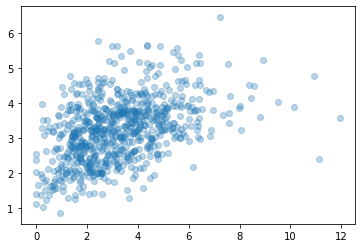

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data
X, y  = train_sampled[train_sampled.columns[:-2]], train_sampled['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Score with RMSE
print('Score:', mean_squared_error(y_test, model.predict(X_test), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, model.predict(X_test), alpha=0.3)

# Saving Preds

Once we're happy with how we generate our inputs, we must process the test fields in the same way and save predictions. Here it is, condensed. Note the Field_IDs from the sample submission are used, and the same `process_im` function prepares the inputs, this time looking for .npy files in the 'image_arrays_test' folder. 

In [16]:
# Load the sample submission file
ss = pd.read_csv('SampleSubmission.csv')

# Prep the data, using the same method we did for train
test_sampled = pd.DataFrame([process_im(fid, folder='image_arrays_test') for fid in ss['Field_ID'].values])

# Get model predictions
preds = model.predict(test_sampled)

# Store them in the submission dataframe and save
ss['Yield'] = preds
ss.to_csv('Sub.csv', index=False)
ss.head()

,Field_ID,Yield
0,E9UZCEA,3.626345
1,1WGGS1Q,3.272307
2,EG2KXE2,3.755840
3,HC3GQXF,3.713095
4,7AK6GFK,3.790871


You can submit the Sub.csv file generated here on Zindi. This example scores ~2 (not as good as our score on our local test set, because the fields are more geographically separated). Now let's chat about ways to make this better:

# Improvements


1.   For the example above I chose the 'bands of interest' fairly randomly. A bit of research into which Sentinel 2 bands are used in this kind of task and what the different climate variables are should help make more informed choices there.
2.   We looked at all 12 months. Maize is normally planted just before the March-May rainy season (I think?) and harvested a few months later. Choose which months you'll prioritise to cut down on less useful data
3.   We looked at only the center pixel. Can you use a wider area to get better features? What about finding which pixels are most likely fields and sampling those?
4.   We did no model tuning, so obviously lots of fun to be had there
5.   Low-quality locations are often not fields - leave these out of your training set for better results. There are no low-quality (Quality=1) fields in the test set.
6.   Common measures such as NDVI, EVI etc can be computed by combining different bands. Look up how these vegetative indices are calculated for sentinel 2 and see if you can add those as features.
6.   ... As always, be creative - I'm sure there are lots more improvements to be made



In [87]:
def process_im_bandName(fid, bandName, folder='image_arrays_train'):
  fn = f'{folder}/{fid}.npy'
  arr = np.load(fn)
  bands_of_interest = [bandName]
  values = {}
  for month in range(12):
    bns = [str(month) + '_' + b for b in bands_of_interest] # Bands of interest for this month
    idxs = np.where(np.isin(band_names, bns)) # Index of these bands
    vs = arr[idxs, 20, 20] # Sample the im at the center point
    for bn, v in zip(bns, vs[0]):
      values[bn] = v
  return values

def process_im_months(fid, month, folder='image_arrays_train'):
    band_names_noMonths = []
    for bn in band_names:
        band_names_noMonths.append(bn[2:])
    fn = f'{folder}/{fid}.npy'
    arr = np.load(fn)
    values = {}
    bns = [str(month) + '_' + b for b in band_names_noMonths] # Bands of interest for this month
    idxs = np.where(np.isin(band_names, bns)) # Index of these bands
    vs = arr[idxs, 20, 20] # Sample the im at the center point
    for bn, v in zip(bns, vs[0]):
        values[bn] = v
    return values


# Example
# process_im('35AFSDD')

In [28]:
class PCA:
    def __init__(self, target_explained_variance=None):
        """
        explained_variance: float, the target level of explained variance
        """
        self.target_explained_variance = target_explained_variance
        self.feature_size = -1

    def standardize(self, X):
        """
        standardize features using standard scaler
        :param m X n: features data
        :return: standardized features
        """
        # YOUR CODE HERE
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        return X
#         raise NotImplementedError()

    def compute_mean_vector(self, X_std):
        """
        compute mean vector
        :param X_std: data
        :return n X 1 matrix: mean vector
        """
        # YOUR CODE HERE
        return np.mean(X_std, axis=0)
#         raise NotImplementedError()

    def compute_cov(self, X_std, mean_vec):
        """
        Covariance using mean, (don't use any numpy.cov)
        :param X_std:
        :param mean_vec:
        :return n X n matrix: covariance matrix
        """
        # YOUR CODE HERE
        covMat = (X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
        return covMat
#         raise NotImplementedError()

    def compute_eigen_vector(self, cov_mat):
        """
        Eigenvector and eigen values using numpy
        :param cov_mat:
        :return: (eigen_vector,eigen_values)
        """
        # YOUR CODE HERE
        eig_vals,eig_vecs = np.linalg.eig(cov_mat)
        return (eig_vecs,eig_vals)
#         raise NotImplementedError()

    def compute_explained_variance(self, eigen_vals):
        """
        sort eigen values and compute explained variance.
        explained variance informs the amount of information (variance)
        can be attributed to each of  the principal components.
        :param eigen_vals:
        :return: explained variance.
        """
        # YOUR CODE HERE
        return eigen_vals/np.sum(eigen_vals)
#         raise NotImplementedError()

    def cumulative_sum(self, var_exp):
        """
        return cumulative sum of explained variance.
        :param var_exp: explained variance
        :return: cumulative explained variance
        """
        return np.cumsum(var_exp)

    def compute_weight_matrix(self, eig_pairs, var_exp):
        """
        compute weight matrix of top principal components conditioned on target
        explained variance.
        Hint : 
            use cumulative explained variance and target_explained_variance 
            to find top components
        
        :param eig_pairs: list of tuples containing eigenvector and eigen values
        :param var_exp: *sorted* explained variance proportions, by features
        :return: weight matrix
        """
        # YOUR CODE HERE
        cumVar = self.cumulative_sum(var_exp)
        index = 0
        while cumVar[index] < self.target_explained_variance:
            index+=1
        weight_mat = np.array([vec for vec in eig_pairs[0][:index]])
        return weight_mat
#         raise NotImplementedError()

    def transform_data(self, X_std, matrix_w):
        """
        transform data to subspace using weight matrix
        :param X_std: standardized data
        :param matrix_w: weight matrix
        :return: data in the subspace
        """
        return X_std.dot(matrix_w)

    def fit(self, X):
        """
        entry point to the transform data to k dimensions
        standardize and compute weight matrix to transform data.
        :param   m X n dimension: train samples
        :return  m X k dimension: subspace data.
        """
    
        self.feature_size = X.shape[1]
        
        # YOUR CODE HERE
#         raise NotImplementedError()
        X_std = self.standardize(X)

        mean_vec = self.compute_mean_vector(X_std)

        cov_mat = self.compute_cov(X_std, mean_vec) 

        eig_pairs = self.compute_eigen_vector(cov_mat)

        var_exp = self.compute_explained_variance(eig_pairs[1])

        matrix_w = self.compute_weight_matrix(eig_pairs, var_exp).T
        return self.transform_data(X_std=X_std, matrix_w=matrix_w)

In [243]:
# Make a new DF with the sampled values from each field 
# train_sampled = pd.DataFrame([process_im(fid) for fid in train['Field_ID'].values])

# Add in the field ID and yield
# train_sampled['Field_ID'] = train['Field_ID'].values
# train_sampled['Yield'] = train['Yield'].values

# # Make a new DF with the sampled values from each field 
month = 1
train_sampled = pd.DataFrame([process_im_months(fid, month) for fid in train['Field_ID'].values])

for colName in train_sampled.columns:
    if len(list(train_sampled[colName].unique())) < 3:
        train_sampled.drop(colName, axis=1, inplace=True)

# # Add in the field ID and yield
train_sampled['Field_ID'] = train['Field_ID'].values
train_sampled['Yield'] = train['Yield'].values

X, y  = train_sampled[train_sampled.columns[:-2]], train_sampled['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()

,1_S2_B1,1_S2_B2,1_S2_B3,1_S2_B4,1_S2_B5,1_S2_B6,1_S2_B7,1_S2_B8,1_S2_B8A,1_S2_B9,...,1_CLIM_pet,1_CLIM_pr,1_CLIM_ro,1_CLIM_soil,1_CLIM_srad,1_CLIM_tmmn,1_CLIM_tmmx,1_CLIM_vap,1_CLIM_vpd,1_CLIM_vs
1197,1215,1479,1486,1665,1378,2088,2490,2548,2705,569,...,1565,107,5,95,2545,157,315,1758,146,349
1515,1223,1156,1185,1386,1457,1779,2007,2047,2273,539,...,1540,84,4,114,2517,148,312,1673,146,339
664,1106,925,917,1065,1120,1795,2031,1652,2180,775,...,1633,40,2,262,2583,163,325,1498,189,300
1360,1194,1114,1114,1120,1443,1884,2164,2025,2448,621,...,1534,89,4,119,2553,129,309,1532,146,328
2296,1206,965,980,834,1313,2344,2742,2631,3040,823,...,1504,17,1,405,2528,163,316,1783,149,290


In [248]:
pcaObj = PCA(target_explained_variance=0.99)
X_train_updated = pcaObj.fit(X_train)

X_t, X_test, y_t, y_test = train_test_split(X_train_updated, y_train, test_size=0.20, random_state = 5622)

clf = GradientBoostingRegressor(random_state=0)

clf.fit(X_t, y_t)

print(mean_squared_error(y_test, clf.predict(X_test), squared=False))

1.6356214032753102


In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

target_explained_variances = []
numbers_of_components = []
accuraciesRF = []
accuraciesGB = []
# accuraciesXGB = []
# Set models
# xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
clf = GradientBoostingRegressor(random_state=0)
model = RandomForestRegressor()
for target_variance in np.arange(0.5, 1.0, .02):
    pcaObj = PCA(target_explained_variance=target_variance)
    X_train_updated = pcaObj.fit(X_train)
    
    target_explained_variances.append(target_variance)
    numbers_of_components.append(X_train_updated.shape[1])
    
    X_t, X_test, y_t, y_test = train_test_split(X_train_updated, y_train, test_size=0.05, random_state = 5622)
    
    # Fit the model
    # Random Forest Regressor
    model.fit(X_t, y_t)
    
    # XGboost
#     xgb_model.fit(X_t, y_t)
    
    # GradBoost
    clf.fit(X_t, y_t)

    # Score with RMSE
    accuraciesRF.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
    accuraciesGB.append(mean_squared_error(y_test, clf.predict(X_test), squared=False))
#     accuraciesXGB.append(mean_squared_error(y_test, xgb_model.predict(X_test), squared=False))
    print(target_variance,end=",")

0.5,0.52,0.54,0.56,0.5800000000000001,0.6000000000000001,0.6200000000000001,0.6400000000000001,0.6600000000000001,0.6800000000000002,0.7000000000000002,0.7200000000000002,0.7400000000000002,0.7600000000000002,0.7800000000000002,0.8000000000000003,0.8200000000000003,0.8400000000000003,0.8600000000000003,0.8800000000000003,0.9000000000000004,0.9200000000000004,0.9400000000000004,0.9600000000000004,0.9800000000000004,

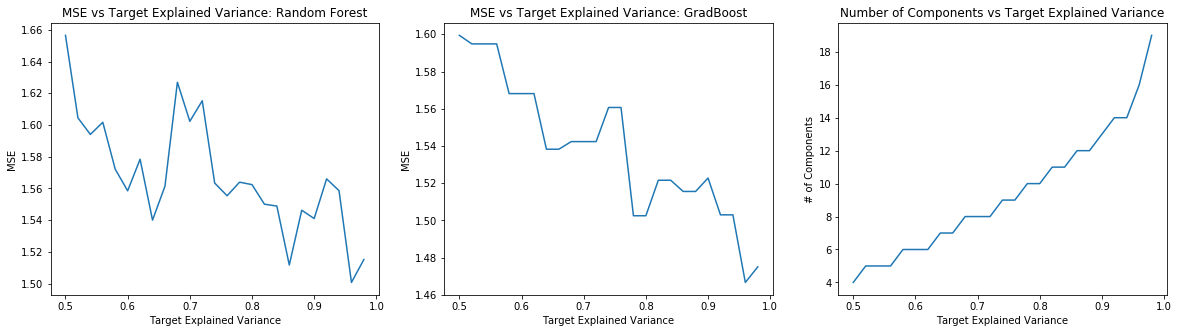

In [54]:
# Make plots
fig, ax = plt.subplots(figsize=(20,5),ncols=3)
ax[0].plot(target_explained_variances,accuraciesRF)
ax[0].set_title("MSE vs Target Explained Variance: Random Forest")
ax[0].set_xlabel("Target Explained Variance")
ax[0].set_ylabel("MSE")

ax[1].plot(target_explained_variances,accuraciesGB)
ax[1].set_title("MSE vs Target Explained Variance: GradBoost")
ax[1].set_xlabel("Target Explained Variance")
ax[1].set_ylabel("MSE")

ax[2].plot(target_explained_variances,numbers_of_components)
ax[2].set_title("Number of Components vs Target Explained Variance")
ax[2].set_xlabel("Target Explained Variance")
ax[2].set_ylabel("# of Components")

plt.show()
# raise NotImplementedError()

Score: 1.5848413250488524


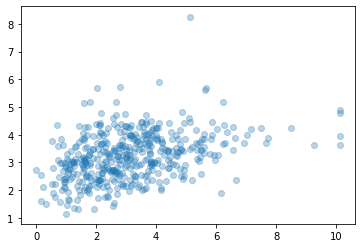

In [42]:
pcaObj = PCA(target_explained_variance=0.99)
X_train_updated = pcaObj.fit(X_train)

X_t, X_test, y_t, y_test = train_test_split(X_train_updated, y_train, test_size=0.2, random_state = 5622)

# Fit the model
model = RandomForestRegressor()
model.fit(X_t, y_t)

# Score with RMSE
print('Score:', mean_squared_error(y_test, model.predict(X_test), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, model.predict(X_test), alpha=0.3)